In [1]:
# Question 2 A

In [23]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [24]:
#taking input images and converting to grey scale
img_lena = np.asarray(Image.open('lena.png').convert('L'))
img_wolves = np.asarray(Image.open('wolves.png').convert('L'))


In [25]:
# scale image in 0 to 1 scale
def scale(array):
    [h,w]=array.shape
    for i in range(0,h):
            for j in range(0,w):
                array[i,j]=array[i,j]/255
    return array
    

In [26]:
# shifting output image to center
def shift(y):
    z=np.fft.fftshift(y)
    return z

In [27]:
# 2D fft function 
def fft2(grey_img):
        new_array=np.array(grey_img,dtype='float16')
        new_array=scale(new_array)
        x = np.fft.fft(new_array,axis=0)
        y= np.fft.fft(x,axis=1)
        z=shift(y)
        return z

In [28]:
#function call to 2D fft function
z=fft2(img_lena)
z1=fft2(img_wolves)

In [29]:
#compute magnitude spectrum and display the image
def magnitude(m):
    s=np.log(1+np.abs(m))
    plt.imshow(s,cmap='gray')

In [30]:
#compute angle spectrum and display
def angle(a):
    a=np.angle(a)
    plt.imshow(a,cmap='gray')

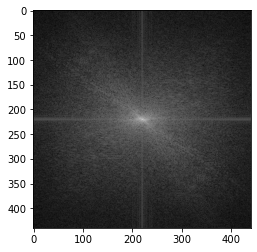

In [31]:
lena_magnitude=magnitude(z)

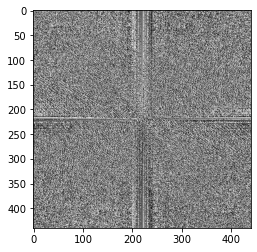

In [32]:
len_angle=angle(z)

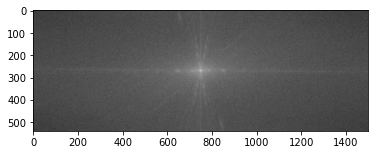

In [33]:
wolves_magnitude=magnitude(z1)

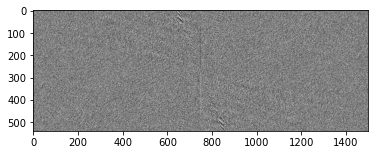

In [34]:
wolves_angle=angle(z1)

In [35]:
# Question 2 B

In [36]:
def fft(c):
    x = np.fft.fft(c,axis=0)
    y= np.fft.fft(x,axis=1)
    return y

In [50]:
def process_lena(a):
        output=abs(a)*img_lena.max()
        output=np.round(output).astype(np.uint8)
        return output       

In [51]:
def process_wolves(a):
     output=abs(a)*img_wolves.max()
     output=np.round(output).astype(np.uint8)
     return output

In [52]:
def math(y):
    [a,b]=y.shape
    inv=y/(a*b)
    N=(abs(inv)).max()
    inv=inv/N
    return inv

In [53]:
#Inverse FFT function
def ifft2(z):
    conjugate= np.conj(z)
    conjugate=scale(conjugate)
    y=fft(conjugate)
    y=math(y)
    op=np.conj(y)
    return op
       

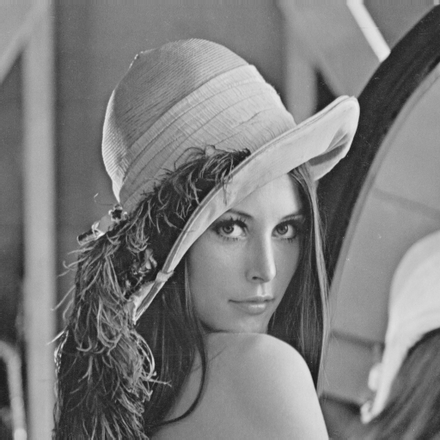

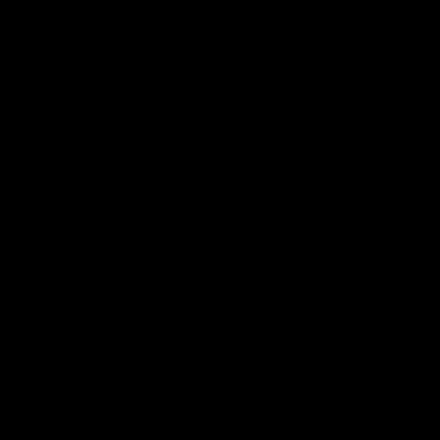

In [70]:
#display inverse fft output for lena and display the difference between images
a=ifft2(z)
a=process_lena(a)
op_lena= Image.fromarray(a)
display(op_lena)
difference_lena = op_lena - img_lena
diff = Image.fromarray(difference_lena)
display(diff)

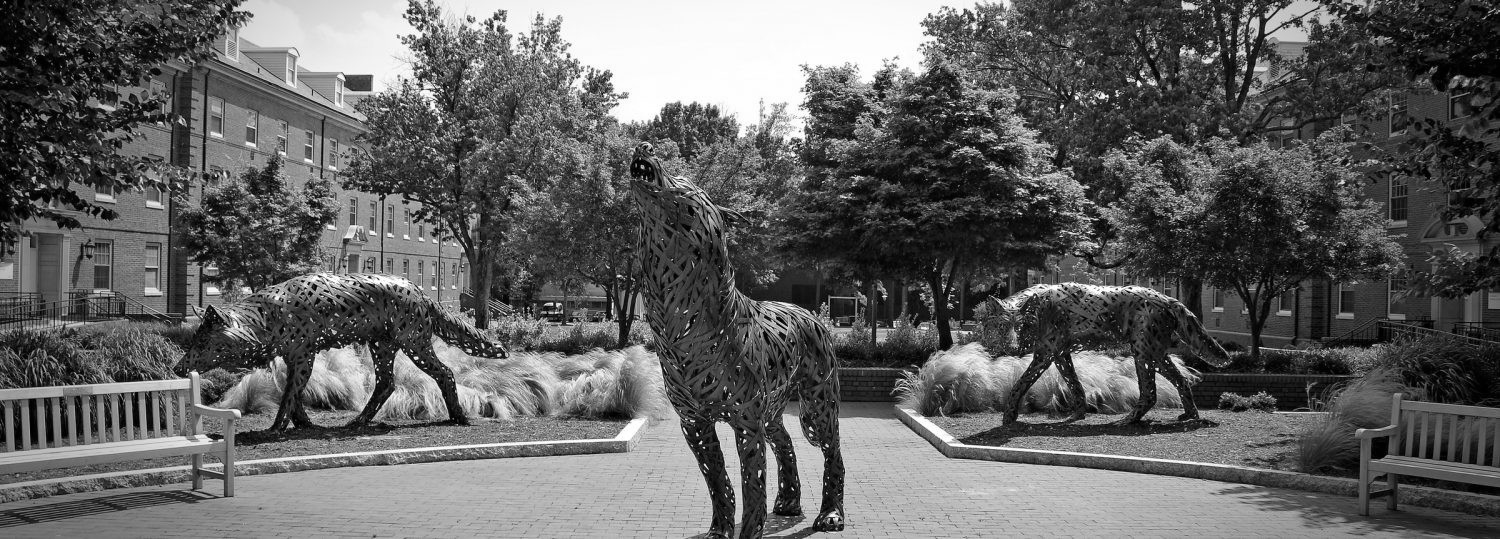

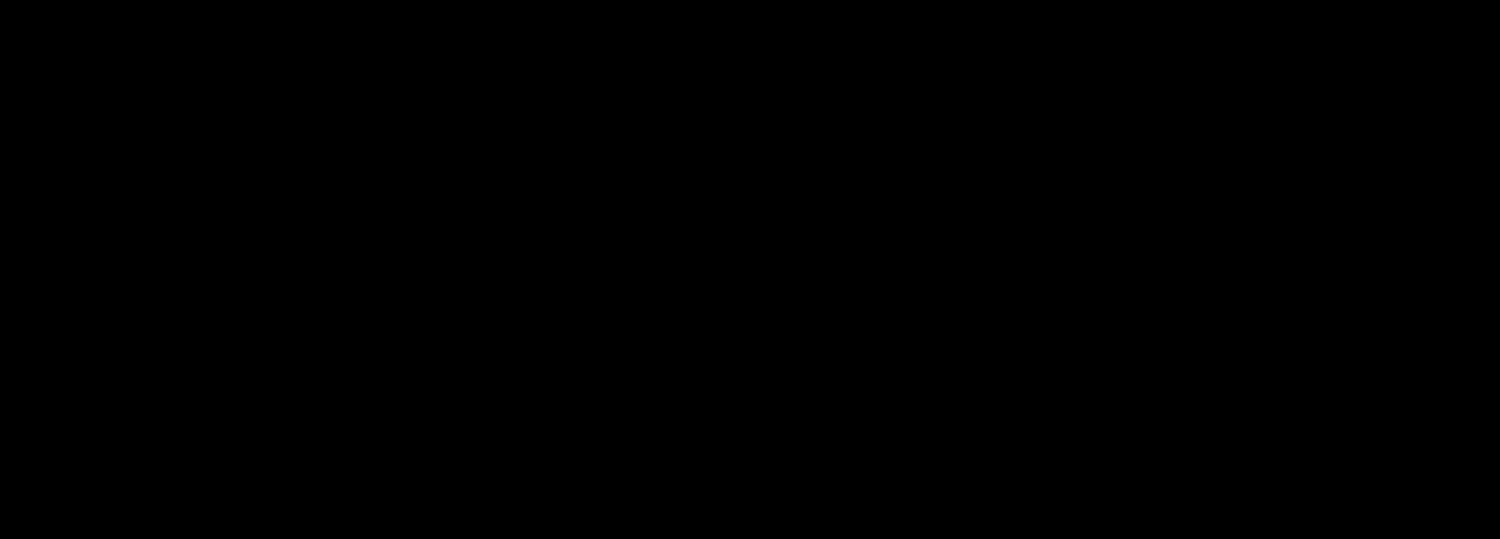

In [71]:
#display inverse fft output for wolves and display the difference between images
a=ifft2(z1)
a=process_wolves(a)
op_wolves = Image.fromarray(a)
display(op_wolves)
difference_wolves = op_wolves- img_wolves
diff = Image.fromarray(difference_wolves)
display(diff)